In [1]:
# 📌 1. Imports
# --------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 📌 2. Load Preprocessed Data
# --------------------------------------------
df = pd.read_csv('../Data/preprocessed_crime_dataset.csv')
print("✅ Data Loaded! Shape:", df.shape)
df.head()

✅ Data Loaded! Shape: (3000, 6)


,Crime_Category,Crime_Severity_Level,Use_of_Weapon,Repeat_Offender,IPC_Section_and_Punishment,Severity_Weapon_Flag
0,2,0,1,1,0,0
1,0,1,0,1,1,0
2,0,1,1,1,1,0
3,1,2,0,1,3,0
4,0,2,0,1,1,0


In [3]:
# 📌 3. Define Features and Target
# --------------------------------------------
X = df[['Crime_Category', 'Crime_Severity_Level', 'Use_of_Weapon', 'Repeat_Offender', 'Severity_Weapon_Flag']]
y = df['IPC_Section_and_Punishment']

In [4]:
# 📌 4. Train/Test Split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2400, 5)
Test shape: (600, 5)


In [5]:
# --------------------------------------------
# 📌 5. Confirm loaded models
# --------------------------------------------
# ⚠️ These must be trained already in your training notebook!
print("✅ Models in memory: lr, svm, rf, ada, gb")


✅ Models in memory: lr, svm, rf, ada, gb


LR Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       147

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



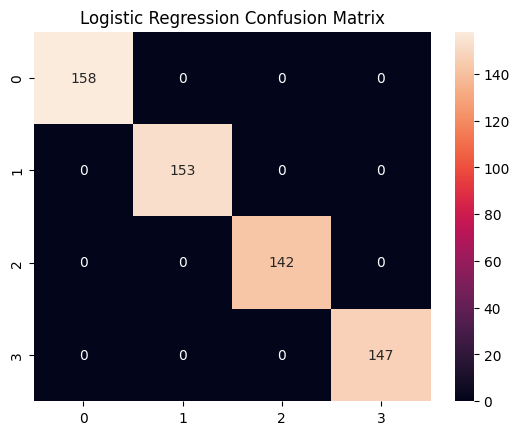

In [7]:
# --------------------------------------------
# 📌 6. Evaluate Logistic Regression
# --------------------------------------------
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       147

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



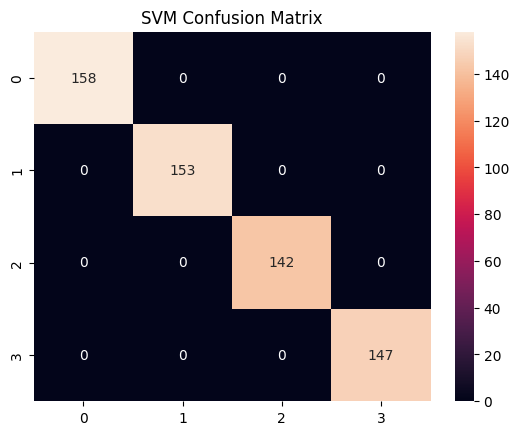

In [9]:
# --------------------------------------------
# 📌 7. Evaluate SVM
# --------------------------------------------
from sklearn.svm import SVC

# Train SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       147

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



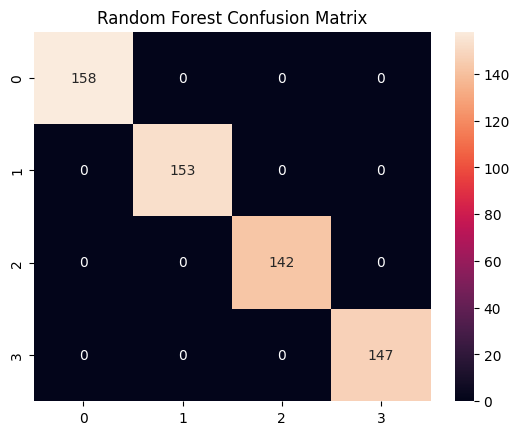

In [11]:
# --------------------------------------------
# 📌 8. Evaluate Random Forest
# --------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


AdaBoost Accuracy: 0.5183333333333333
              precision    recall  f1-score   support

           0       0.35      1.00      0.52       158
           1       1.00      1.00      1.00       153
           2       0.00      0.00      0.00       142
           3       0.00      0.00      0.00       147

    accuracy                           0.52       600
   macro avg       0.34      0.50      0.38       600
weighted avg       0.35      0.52      0.39       600



c:\Users\shiva\anaconda3\envs\project_7\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\anaconda3\envs\project_7\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\anaconda3\envs\project_7\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

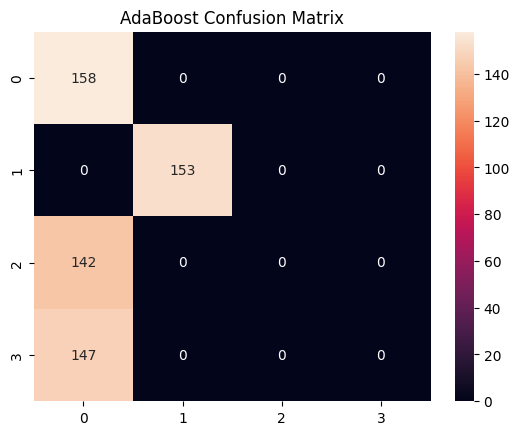

In [13]:
# --------------------------------------------
# 📌 9. Evaluate AdaBoost
# --------------------------------------------
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

cm_ada = confusion_matrix(y_test, ada_pred)
sns.heatmap(cm_ada, annot=True, fmt='d')
plt.title("AdaBoost Confusion Matrix")
plt.show()


Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       147

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



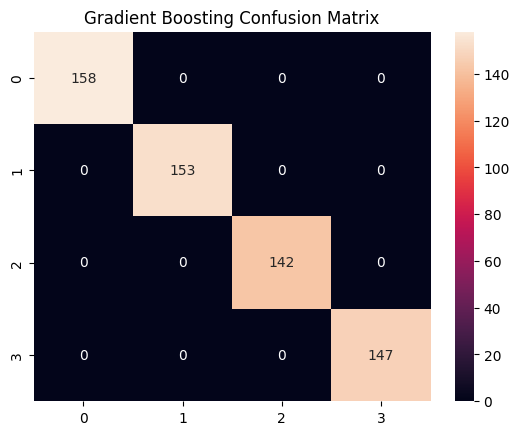

In [15]:
# --------------------------------------------
# 📌 10. Evaluate Gradient Boosting
# --------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

cm_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_gb, annot=True, fmt='d')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
✅ Tuned RF Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       147

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



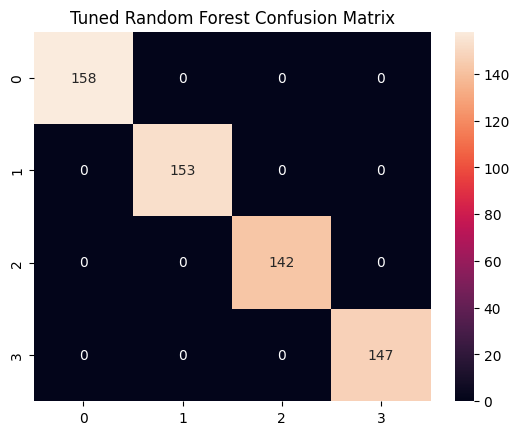

In [16]:
# --------------------------------------------
# 📌 11. Simple Hyperparameter Tuning — Random Forest
# --------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# Setup small param grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=3,
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train, y_train)

print("✅ Best Params:", grid.best_params_)

# Evaluate tuned RF
tuned_rf = grid.best_estimator_
tuned_rf_pred = tuned_rf.predict(X_test)

print("✅ Tuned RF Accuracy:", accuracy_score(y_test, tuned_rf_pred))
print(classification_report(y_test, tuned_rf_pred))

cm_tuned_rf = confusion_matrix(y_test, tuned_rf_pred)
sns.heatmap(cm_tuned_rf, annot=True, fmt='d')
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()
